In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import psycopg2
import fsspec

In [93]:
df=pd.read_csv("C://Users//HP//Downloads//output_data.csv")

In [94]:
df.describe()

,Timestamp,OC,OT,PC
count,9.455300e+04,9.455300e+04,94553.000000,9.455300e+04
mean,1.721239e+12,1.322567e+04,4797.482988,2.560386e+04
std,7.815674e+08,4.271491e+05,6814.783904,5.627234e+05
min,1.719772e+12,0.000000e+00,0.000000,0.000000e+00
25%,1.720558e+12,1.702000e+03,2218.000000,3.000000e+03
50%,1.721347e+12,2.087000e+03,2400.000000,4.182000e+03
75%,1.721882e+12,3.025000e+03,2837.000000,1.070000e+04
max,1.722451e+12,1.684091e+07,64000.000000,1.684184e+07


In [95]:
# X = df["OC"]
# Y = df["PC"]
# Z = df["OT"]

# fig, ax = plt.subplots(figsize=(9, 6))


# scatter = ax.scatter(X, Y, c=Z, cmap='Greens', s=80, alpha=0.7, edgecolors='w')

# cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
# cbar.set_label('OT', rotation=270, labelpad=15)

# ax.set_xlabel('Operating Current (OC)')
# ax.set_ylabel('Peak Current (PC)')
# ax.set_title('Scatter Plot with Variable Colors', size=10
#              )

# plt.show()

In [96]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Example data (replace with your actual data)
# X = df["OC"]
# Y = df["PC"]
# Z = df["OT"]

# # Define color ranges or categories (example)
# colors = np.where(Z > 64000, 'red', np.where(Z > 2218.000000, 'orange', 'green'))

# fig, ax = plt.subplots(figsize=(16,7))

# # Scatter plot with specific colors
# scatter = ax.scatter(X, Y, c=colors, s=80, edgecolors='w')

# # Customizing the plot
# ax.set_xlabel('Operating Current (OC)')
# ax.set_ylabel('Peak Current (PC)')
# ax.set_title('Scatter Plot with Fixed Colors', size=10)

# # Creating a legend manually
# import matplotlib.patches as mpatches
# legend_elements = [mpatches.Patch(color='red', label='Z > 2294'),
#                    mpatches.Patch(color='orange', label='2000 < Z <= 2294'),
#                    mpatches.Patch(color='green', label='Z <= 2000')]
# ax.legend(handles=legend_elements, loc='best')

# plt.show()

In [97]:
print(df['DeviceID'].nunique())


117


In [98]:
# unique_device_ids = df['DeviceID'].unique()
# print(unique_device_ids)

unique_device_ids = df['DeviceID'].unique().tolist()
print(unique_device_ids)


['19083212-f248-48f5-b7c2-1902d366da74', '26fef3fe-5c95-49b3-aff3-737124c6244b', 'c65c0b55-2fc3-4424-8829-a57d14b6369f', 'c53a9e0a-da20-450d-997e-0634d3d910a6', 'b7994a32-949c-41a1-98ee-c34495d73782', '29e4a849-181f-44cf-b389-aba2ce76b4e9', 'db18c473-1dc3-4d2a-b6b9-60db12b71009', '6aa15284-a078-4f25-b1b9-7045ce071b47', '37f5bebd-280f-4f59-bf25-e993f7d9cb76', '78dc75f8-ad37-455d-b0af-c00059dfca80', 'e2dd353c-543e-4af7-935c-a581cde16963', 'e77b973a-b7c9-4113-8598-4e85be9a8b34', 'a0e96432-03d1-4e10-8478-d80361502cb9', '6319c97f-7dd3-4ccc-b444-9433ee865f16', '7563e701-93db-4c80-a2f8-a192525530f3', 'cdf66fd5-2fc1-4300-88f8-a165710bf8da', 'bd7b4624-1927-4c22-98e3-c9950f3af4e2', '38f26ded-4776-413a-a0f9-5a87c22eaa10', 'c071009e-2ef6-4886-b301-30e09d5f2467', '3dc52ae2-8de2-4714-aa93-e279636d476c', '1e0c5165-e353-436f-aa85-b5e1ff85dec2', '7b846d1b-72a0-441f-b7de-c76bfa252d0d', '5def97b0-a22d-4d15-994f-dc047c43d8bc', '33e50c36-30f1-46b9-996d-5867025bca05', 'a6550e45-4328-4b59-8672-6aab6648cedb',

In [106]:
# df=df[df[DeviceID]=="19083212-f248-48f5-b7c2-1902d366da74"] wrorng
dd = df[df['DeviceID'] == '19083212-f248-48f5-b7c2-1902d366da74']
dd


,Timestamp,DeviceID,OC,OT,PC
0,1719772222108,19083212-f248-48f5-b7c2-1902d366da74,1725,2280,2852
14,1719773210927,19083212-f248-48f5-b7c2-1902d366da74,1379,2081,2794
99,1719776630116,19083212-f248-48f5-b7c2-1902d366da74,1735,2281,2784
103,1719776739488,19083212-f248-48f5-b7c2-1902d366da74,1331,2079,2792
120,1719777263732,19083212-f248-48f5-b7c2-1902d366da74,1612,2425,2918
...,...,...,...,...,...
94455,1722446277485,19083212-f248-48f5-b7c2-1902d366da74,1536,2280,2529
94487,1722448187540,19083212-f248-48f5-b7c2-1902d366da74,1583,2123,2720
94512,1722448975154,19083212-f248-48f5-b7c2-1902d366da74,1556,2085,2884
94518,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2276,2821


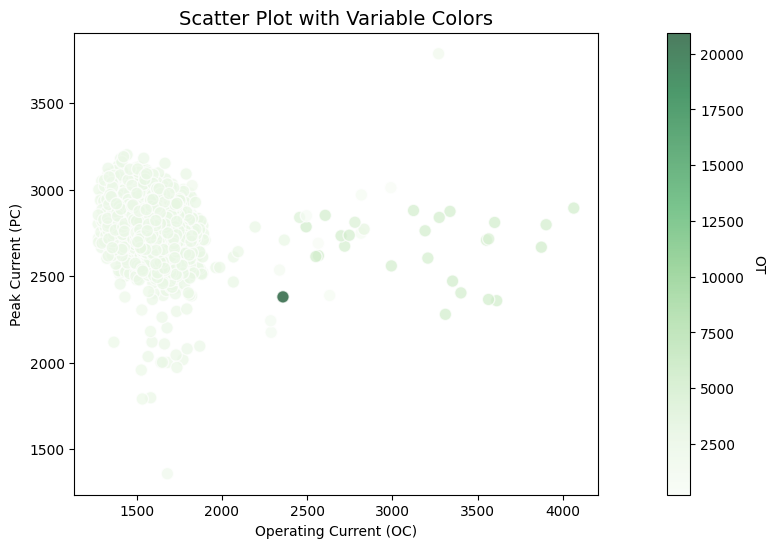

In [100]:
X = dd["OC"]
Y = dd["PC"]
Z = dd["OT"]

fig, ax = plt.subplots(figsize=(9, 6))


scatter = ax.scatter(X, Y, c=Z, cmap='Greens', s=80, alpha=0.7, edgecolors='w')

cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('OT', rotation=270, labelpad=15)

ax.set_xlabel('Operating Current (OC)')
ax.set_ylabel('Peak Current (PC)')
ax.set_title('Scatter Plot with Variable Colors', size=14)

plt.show()

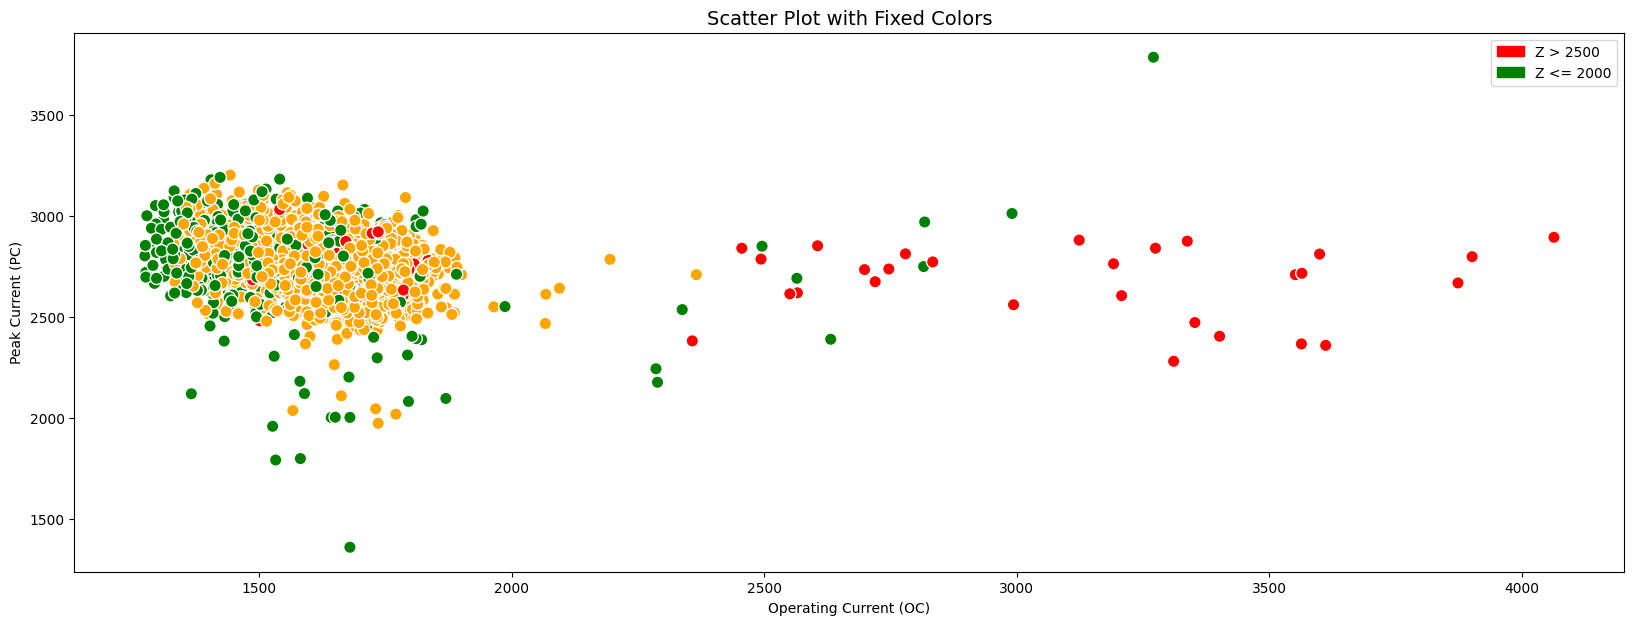

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
X = dd["OC"]
Y = dd["PC"]
Z = dd["OT"]

# Define color ranges or categories (example)
colors = np.where(Z > 2500, 'red', np.where(Z > 2087, 'orange', 'green'))

fig, ax = plt.subplots(figsize=(20,7))

# Scatter plot with specific colors
scatter = ax.scatter(X, Y, c=colors, s=80, edgecolors='w')

# Customizing the plot
ax.set_xlabel('Operating Current (OC)')
ax.set_ylabel('Peak Current (PC)')
ax.set_title('Scatter Plot with Fixed Colors', size=14)

# Creating a legend manually
import matplotlib.patches as mpatches
legend_elements = [mpatches.Patch(color='red', label='Z > 2500'),
                   mpatches.Patch(color='green', label='Z <= 2000')]
ax.legend(handles=legend_elements, loc='best')

plt.show()


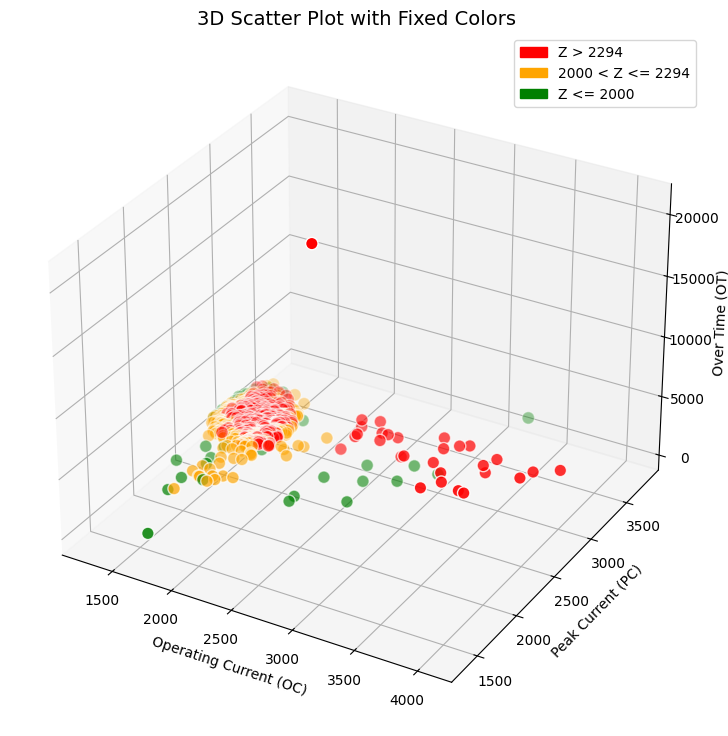

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data (replace with your actual data)
X = dd["OC"]
Y = dd["PC"]
Z = dd["OT"]

# Define color ranges or categories (example)
colors = np.where(Z > 2294, 'red', np.where(Z > 2087, 'orange', 'green'))

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot with specific colors
scatter = ax.scatter(X, Y, Z, c=colors, s=80, edgecolors='w')

# Customizing the plot
ax.set_xlabel('Operating Current (OC)')
ax.set_ylabel('Peak Current (PC)')
ax.set_zlabel('Over Time (OT)')
ax.set_title('3D Scatter Plot with Fixed Colors', size=14)

# Creating a legend manually
import matplotlib.patches as mpatches
legend_elements = [mpatches.Patch(color='red', label='Z > 2294'),
                   mpatches.Patch(color='orange', label='2000 < Z <= 2294'),
                   mpatches.Patch(color='green', label='Z <= 2000')]
ax.legend(handles=legend_elements, loc='best')

plt.show()


In [103]:
dd.describe()

,Timestamp,OC,OT,PC
count,2.327000e+03,2327.000000,2327.000000,2327.000000
mean,1.721145e+12,1622.193382,2233.591749,2759.643747
std,7.533324e+08,236.792214,491.749261,153.103084
min,1.719772e+12,1274.000000,220.000000,1358.000000
25%,1.720495e+12,1478.000000,2087.000000,2689.000000
50%,1.721195e+12,1622.000000,2274.000000,2760.000000
75%,1.721812e+12,1716.000000,2294.000000,2847.000000
max,1.722450e+12,4064.000000,20943.000000,3785.000000


In [136]:
# correlation_matrix = dd[['OC', 'PC','OT']].corr()
# print(correlation_matrix)
dt=dd[dd["OT"]>5000]
dt

,Timestamp,DeviceID,OC,OT,PC
68869,1721821240572,19083212-f248-48f5-b7c2-1902d366da74,2358,20943,2380


In [125]:
iot_params=["OC","PC","OT"]
for param in iot_params:
    dd=dd[dd[param]<=1e6]

dd


,Timestamp,DeviceID,OC,OT,PC
0,1719772222108,19083212-f248-48f5-b7c2-1902d366da74,1725,2280,2852
14,1719773210927,19083212-f248-48f5-b7c2-1902d366da74,1379,2081,2794
99,1719776630116,19083212-f248-48f5-b7c2-1902d366da74,1735,2281,2784
103,1719776739488,19083212-f248-48f5-b7c2-1902d366da74,1331,2079,2792
120,1719777263732,19083212-f248-48f5-b7c2-1902d366da74,1612,2425,2918
...,...,...,...,...,...
94455,1722446277485,19083212-f248-48f5-b7c2-1902d366da74,1536,2280,2529
94487,1722448187540,19083212-f248-48f5-b7c2-1902d366da74,1583,2123,2720
94512,1722448975154,19083212-f248-48f5-b7c2-1902d366da74,1556,2085,2884
94518,1722449268069,19083212-f248-48f5-b7c2-1902d366da74,1612,2276,2821


In [146]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
scaler=scaler.fit(dd[["OC","PC","OT"]])

In [147]:
from sklearn.cluster import KMeans
def plot_k_values(df:pd.DataFrame,scaler:StandardScaler,dd[["OC","PC","OT"]]):
    intertia=[]
    for k in range(1,11):
        model=KMeans(n_clusters=k)
        model.fit(scaler.transform(dd[["OC","PC","OT"]]))
        intertia.append(model.inertia_)

    plt.plot(range(1,11),intertia,marker='o')
    plt.xlabel("number of clusters")
    plt.show
plot_k_values(df,scaler,iot_params)

SyntaxError: incomplete input (3477860531.py, line 1)